<a href="https://colab.research.google.com/github/banbedangki/Clarity_1/blob/master/K_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
path = "/weight-height.csv"

In [0]:
df_wh=pd.read_csv(path)
df_wh = pd.get_dummies(df_wh)
df_wh.head(3)

,Height,Weight,Gender_Female,Gender_Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
2,74.110105,212.740856,0,1


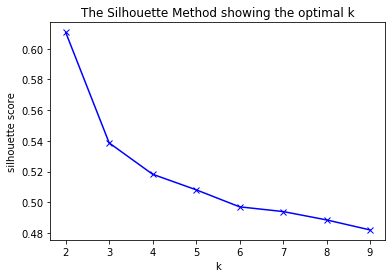

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# from yellowbrick.cluster import SilhouetteVisualizer

def drawSilhouette(X,n_MaxK):
  sil = []
  K=range(2,n_MaxK)
  for k in K:
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
  # Plot the silhouette_score
  plt.plot(K, sil, 'bx-')
  plt.xlabel('k')
  plt.ylabel('silhouette score')
  plt.title('The Silhouette Method showing the optimal k')
  plt.show()
drawSilhouette(df_wh,10)

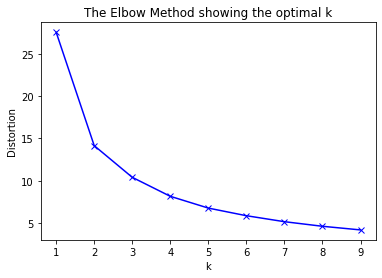

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def drawElbow(X,n_MaxK):
  K=range(1,n_MaxK)
  W = []
  for k in K:
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    W.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / np.shape(X)[0])
  # Plot the elbow
  plt.plot(K, W, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()
drawElbow(df_wh,10)

In [0]:
from sklearn.cluster import KMeans
def clusterByKMean(X,k,col_cluster_name):
  kmeans = KMeans(n_clusters = k).fit(X)
  pred = kmeans.labels_
  return pd.concat([X,pd.DataFrame({col_cluster_name:pred})], axis=1)
  
df_wh_clustered = clusterByKMean(df_wh,2,'cluster')
df_wh_clustered

,Height,Weight,Gender_Female,Gender_Male,cluster
0,73.847017,241.893563,0,1,0
1,68.781904,162.310473,0,1,0
2,74.110105,212.740856,0,1,0
3,71.730978,220.042470,0,1,0
4,69.881796,206.349801,0,1,0
...,...,...,...,...,...
9995,66.172652,136.777454,1,0,1
9996,67.067155,170.867906,1,0,0
9997,63.867992,128.475319,1,0,1
9998,69.034243,163.852461,1,0,0


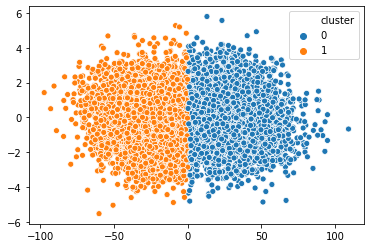

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_wh_clustered)
sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],hue=df_wh_clustered['cluster'])
# principalComponents